In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_json('./AMDFullOptionChain.json')
plt.style.use('fivethirtyeight')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

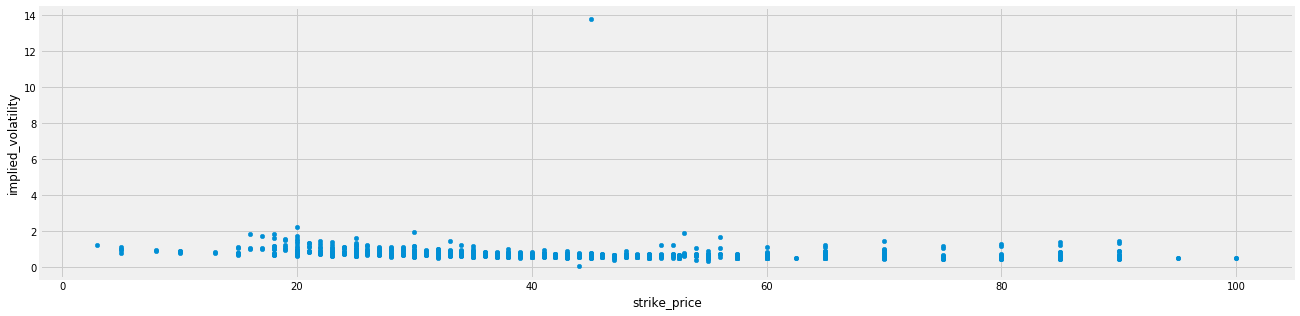

In [2]:
df.plot.scatter('strike_price', 'implied_volatility', figsize=(20,5))

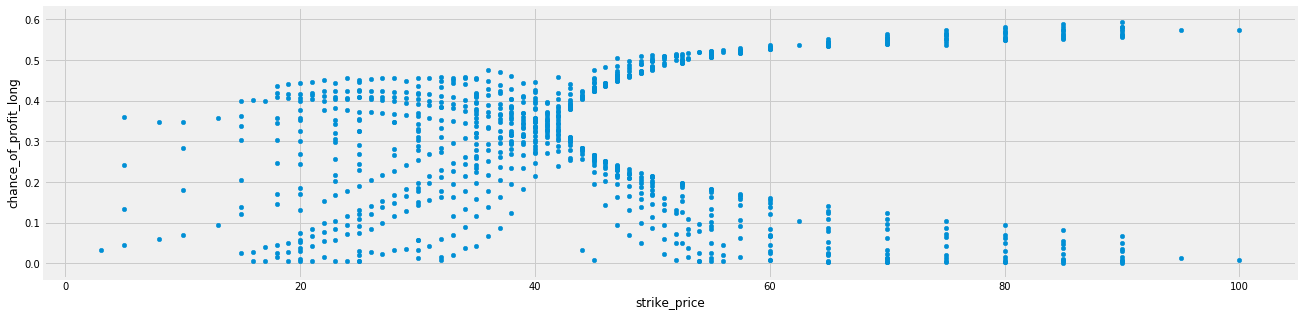

In [3]:
df.plot.scatter('strike_price', 'chance_of_profit_long', figsize=(20,5))

In [4]:
df['product'] = df.apply(lambda row: (row['chance_of_profit_short']/row['implied_volatility']), axis=1)

In [5]:
dfcall = df[df['type'] == 'call']
chance_profit = dfcall['chance_of_profit_long'].describe()['75%']

In [6]:
chance_profit_low_iv = dfcall[dfcall['chance_of_profit_long'] > chance_profit]['implied_volatility'].describe()['25%']

In [7]:
max_profit = dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv)]['adjusted_mark_price'].max()

In [8]:
dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv) & (dfcall['adjusted_mark_price'] == max_profit)]

,adjusted_mark_price,ask_price,ask_size,bid_price,bid_size,break_even_price,chance_of_profit_long,chance_of_profit_short,delta,expiration_date,...,previous_close_date,previous_close_price,rho,strike_price,theta,type,url,vega,volume,product
318,20.53,20.95,95,20.1,460,43.53,0.381814,0.618186,0.925798,2020-10-16,...,2020-04-02,22.4,0.101489,23.0,-0.00802,call,https://api.robinhood.com/options/instruments/...,0.04382,0,0.87002


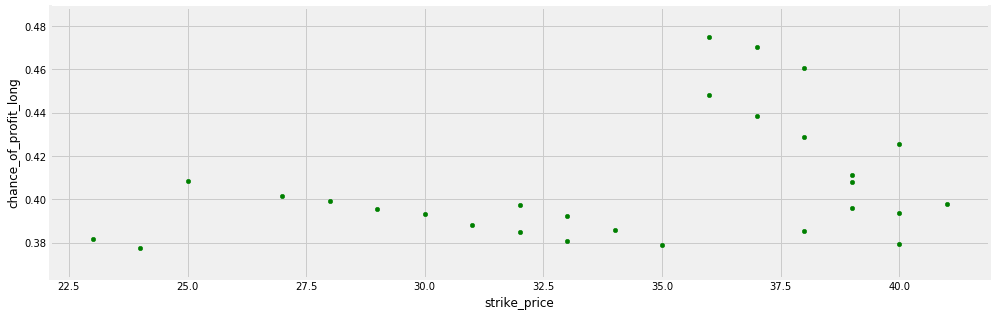

In [9]:

dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv)].plot.scatter('strike_price', 'chance_of_profit_long', figsize=(15,5), c='green')

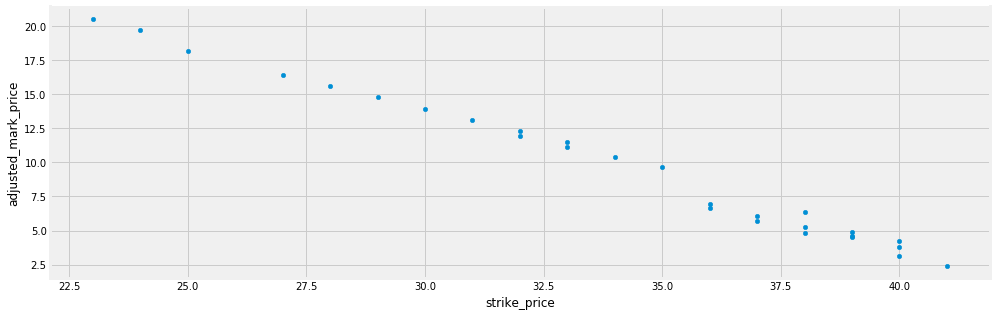

In [10]:
dfcall[(dfcall['chance_of_profit_long'] > chance_profit) & (dfcall['implied_volatility'] < chance_profit_low_iv)].plot.scatter('strike_price', 'adjusted_mark_price', figsize=(15,5))

In [11]:
dfcall[(dfcall['strike_price'] > 35) & (dfcall['strike_price'] < 38)][['adjusted_mark_price', 'strike_price', 'expiration_date', 'volume', 'chance_of_profit_long', 'implied_volatility']].sort_values('chance_of_profit_long', ascending=False).head(10)

,adjusted_mark_price,strike_price,expiration_date,volume,chance_of_profit_long,implied_volatility
150,6.65,36.0,2020-04-09,8,0.475179,0.745410
185,5.70,37.0,2020-04-09,30,0.470449,0.731782
3456,6.95,36.0,2020-04-17,31,0.448155,0.748518
3461,6.10,37.0,2020-04-17,20,0.438732,0.741328
152,7.28,36.0,2020-04-24,0,0.429033,0.760416
183,6.48,37.0,2020-04-24,2,0.419025,0.751386
157,7.63,36.0,2020-05-01,0,0.413253,0.774895
173,7.20,37.0,2020-05-01,0,0.391866,0.858386
2458,8.30,36.0,2020-05-15,0,0.389673,0.794931
2454,7.55,37.0,2020-05-15,8,0.381398,0.777479
